# 1. KNN

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load dataset
iris_X, iris_y = datasets.load_iris(return_X_y=True)



In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_X,
    iris_y,
    test_size=0.2,
    random_state=42,
)

scaler = StandardScaler()
# Fit to data, then transform it.
# Fits transformer to X and y with optional parameters fit_params and returns a transformed version of X.
X_train = scaler.fit_transform(X_train)
# Perform standardization by centering and scaling.
X_test = scaler.transform(X_test)

# Initialize KNN classifier
knn_cls = KNeighborsClassifier(n_neighbors=5)
knn_cls.fit(X_train, y_train)


KNeighborsClassifier()

In [5]:
import numpy as np
from datasets import load_dataset
from sklearn.feature_extraction.text import CountVectorizer

imdb = load_dataset("imdb")
imdb_train, imdb_test = imdb["train"], imdb["test"]


vectorizer = CountVectorizer(max_features=1000)

X_train = vectorizer.fit_transform(imdb_train["text"]).toarray()
X_test = vectorizer.transform(imdb_test["text"]).toarray()
y_train = np.array(imdb_train["label"])
y_test = np.array(imdb_test["label"])

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn_cls = KNeighborsClassifier(n_neighbors=1, algorithm='ball_tree')
knn_cls.fit(X_train, y_train)

y_pred = knn_cls.predict(X_test)
accuracy_score(y_test, y_pred)


0.60444

# 2. KMean


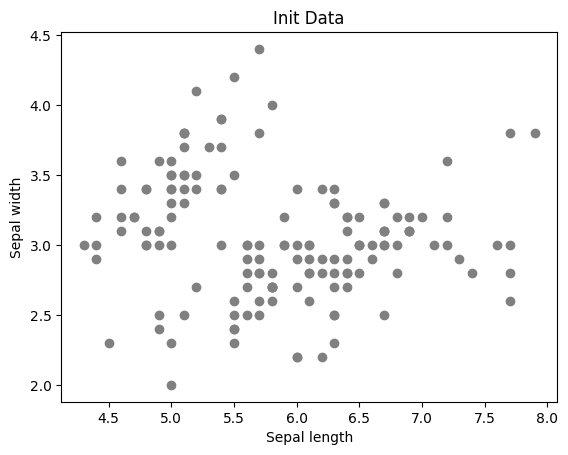

In [6]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
data = iris.data[:, :2] # lấy 2 features đầu tiên

plt.scatter(data[:, 0], data[:, 1], c='gray')
plt.title('Init Data')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

In [11]:
class KMeans:
    def __init__(self, k=3, max_iter=100, random_state=42):
        self.k = k
        self.max_iter = max_iter
        self.centroids = None
        self.clusters = None
        self.random_state = random_state
        
    def _init_centroids(self, X):
        np.random.seed(self.random_state)
        self.centroids = X[np.random.choice(range(X.shape[0]), self.k, replace=False)]
    
    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def _assign_clusters(self, X):
        distances = np.array([[self._euclidean_distance(x, centroid) for centroid in self.centroids] for x in X])
        return np.argmin(distances, axis=1)
    
    def _update_centroids(self, X):
        # self.clusters == i - Tạo một mảng boolean mask (True/False), trong đó: True: các vị trí của điểm dữ liệu thuộc về cụm thứ i, False: các vị trí của điểm dữ liệu không thuộc về cụm thứ i
        # X[self.clusters == i] - Lấy ra tất cả các điểm dữ liệu thuộc về cụm thứ i
        # .mean(axis=0) - Tính trung bình cộng theo từng cột (feature) của tất cả các điểm dữ liệu thuộc về cụm thứ i
        # np.array(...) - Chuyển đổi kết quả thành một mảng numpy
        
        return np.array([X[self.clusters == i].mean(axis=0) for i in range(self.k)])

    def fit(self, X):
        self._init_centroids(X)
        
        for i in range(self.max_iter):
            self.clusters = self._assign_clusters(X)
            self._plot_clusters(X, i)
            new_centroids = self._update_centroids(X)
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids
        self._plot_final_clusters(X)
    
    def _plot_clusters(self, X, i):
        plt.scatter(X[:, 0], X[:, 1], c=self.clusters, cmap='viridis', marker='o')
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], c='red', marker='x', s=200)
        plt.title(f'Iteration: {i + 1}')
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.show()
        
    def _plot_final_clusters(self, X):
        plt.scatter(X[:, 0], X[:, 1], c=self.clusters, cmap='viridis', marker='o')
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], c='red', marker='x', s=200)
        plt.title('Final Clusters and Centroids')
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.show()

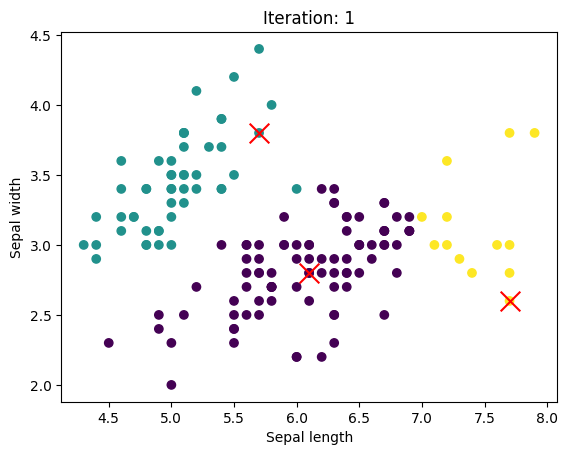

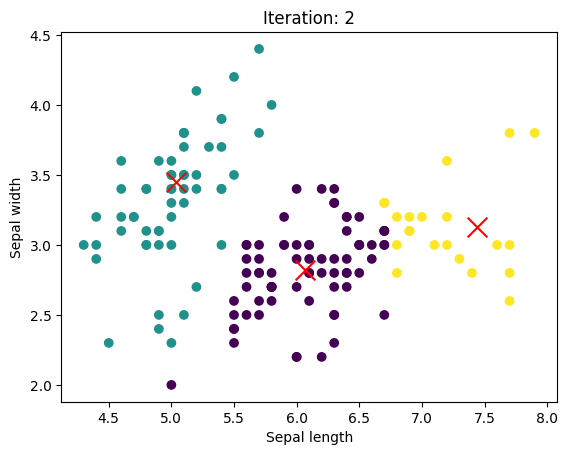

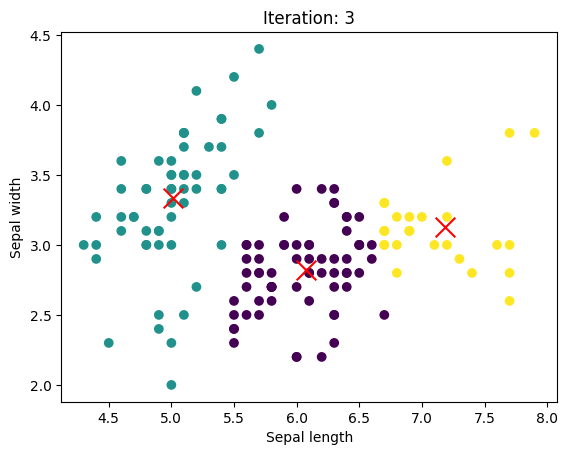

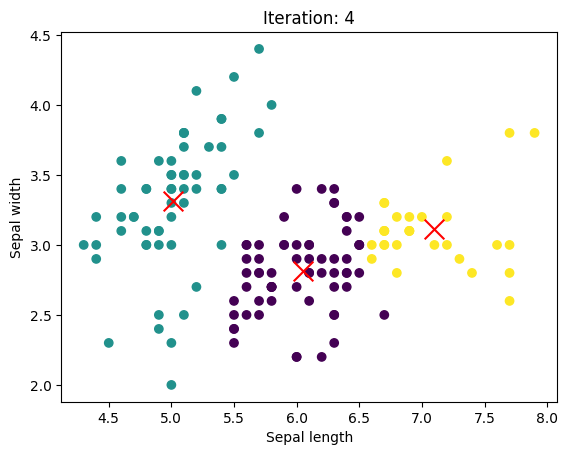

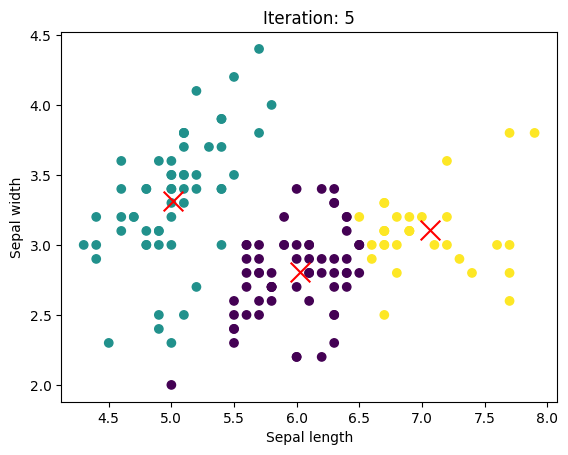

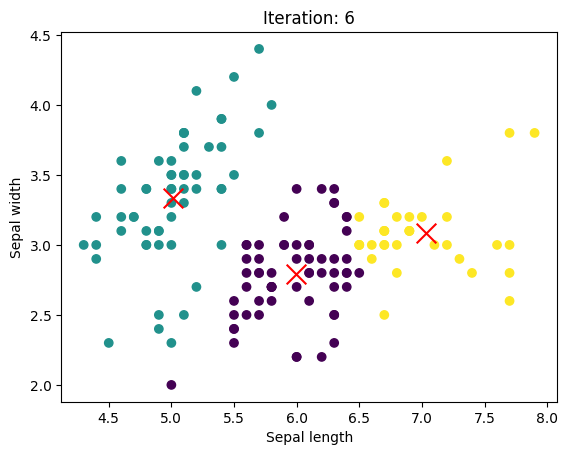

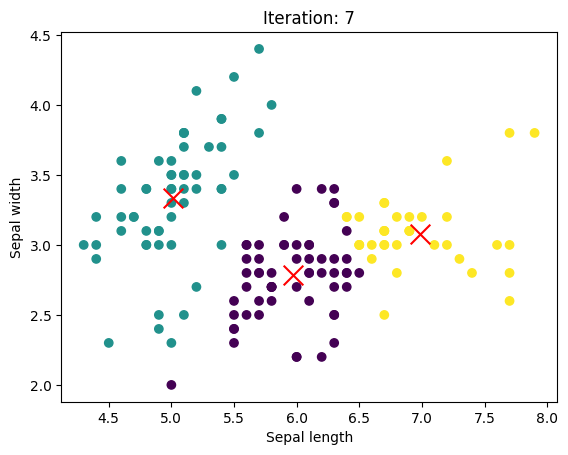

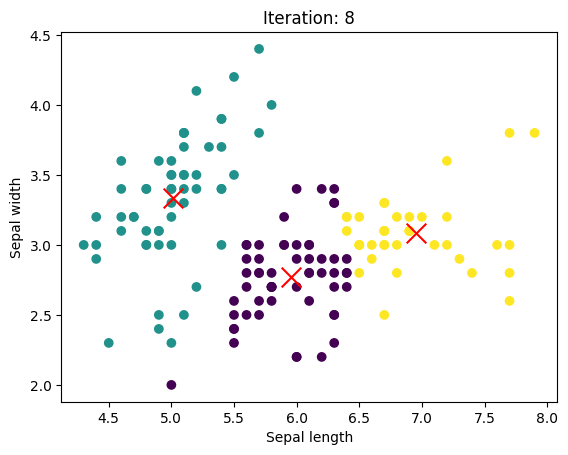

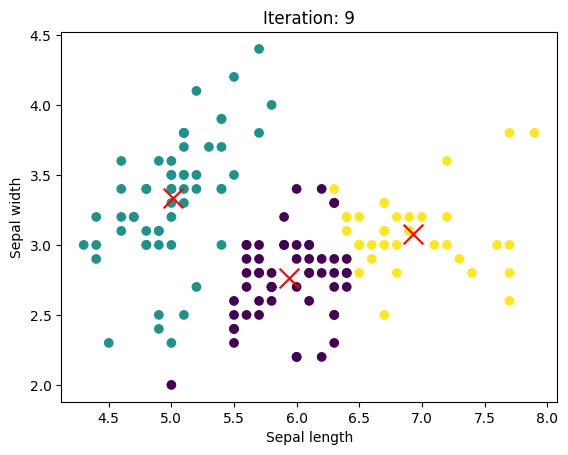

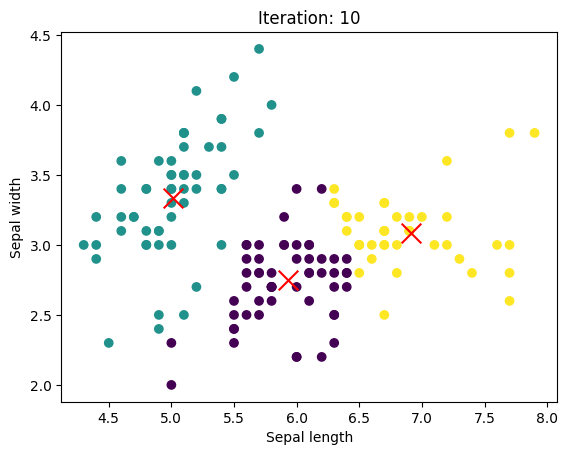

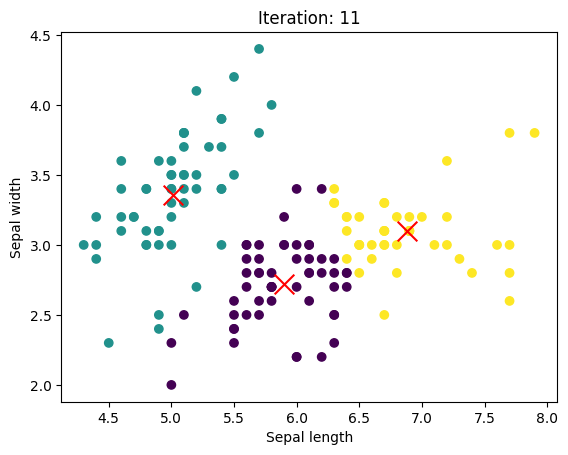

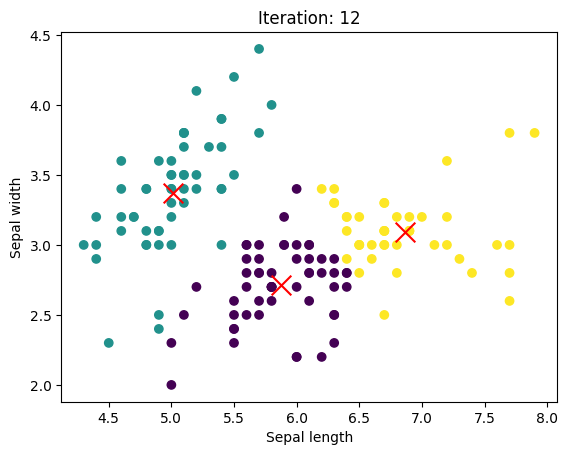

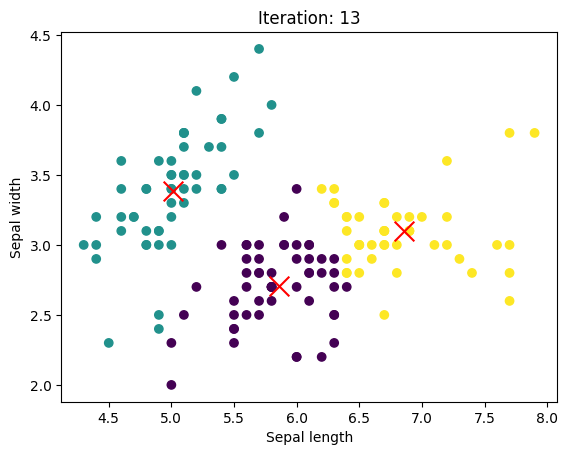

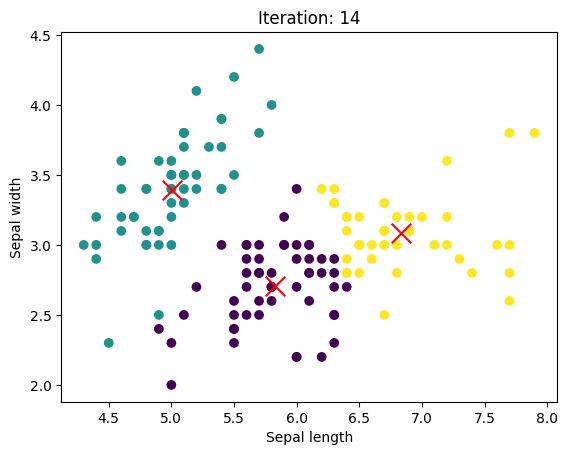

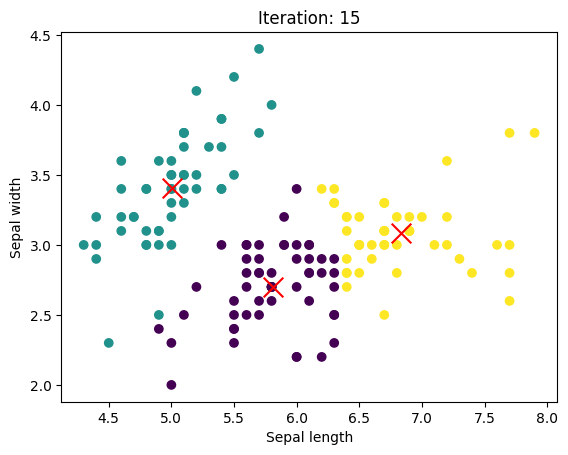

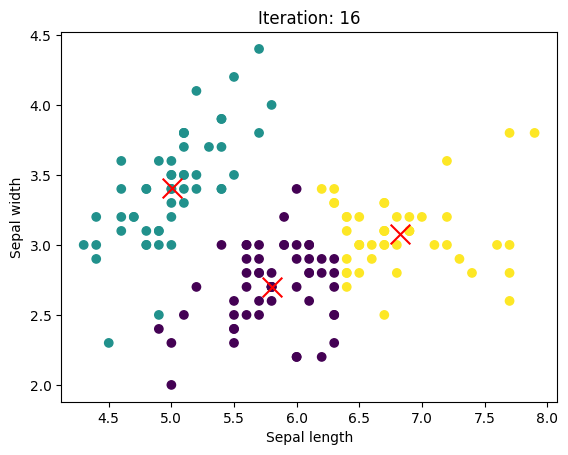

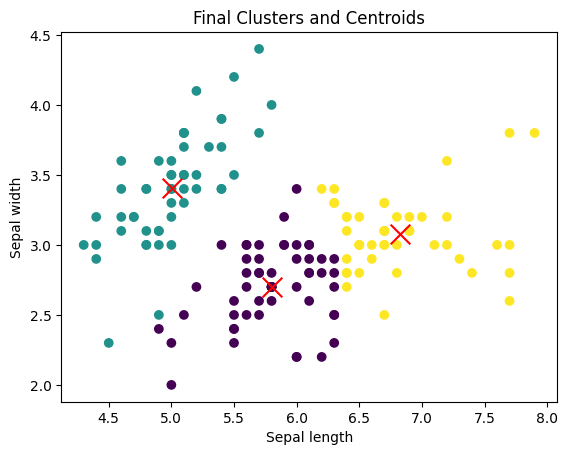

In [12]:
kmeans = KMeans(k=3, max_iter=100, random_state=42)
kmeans.fit(data)
